In [38]:
! pip install -q kaggle

In [39]:
from google.colab import files

In [40]:
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"aswinraj001","key":"8bd9be5862516f3c32a1179b922529d6"}'}

In [41]:
! mkdir ~/.kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [42]:
! cp kaggle.json ~/.kaggle/

In [43]:
! chmod 600 ~/.kaggle/kaggle.json

In [44]:
! kaggle datasets list

ref                                                           title                                                size  lastUpdated          downloadCount  voteCount  usabilityRating  
------------------------------------------------------------  --------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
alphiree/cardiovascular-diseases-risk-prediction-dataset      Cardiovascular Diseases Risk Prediction Dataset       5MB  2023-07-03 12:12:19           2370        104  1.0              
iamsouravbanerjee/data-science-salaries-2023                  Data Science Salaries: 2020-2023                     32KB  2023-07-07 12:53:23           1294         55  1.0              
nelgiriyewithana/countries-of-the-world-2023                  Global Country Information Dataset 2023              23KB  2023-07-08 20:37:33           1310         56  1.0              
shuvammandal121/9000-companies-and-its-ratings-dataset        9000 com

In [45]:
!kaggle datasets download -d limkongkong/airpassengers

  0% 0.00/764 [00:00<?, ?B/s]
100% 764/764 [00:00<00:00, 2.24MB/s]


In [46]:
!unzip -q "/content/airpassengers.zip" -d "/content/sample_data"

In [47]:
import pandas as pd
df = pd.read_csv("/content/sample_data/AirPassengers.csv").set_index('Month')
df.index = pd.to_datetime(df.index)
df.head()

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [ ]:
# Adfuller test to check stationarity

from statsmodels.tsa.stattools import adfuller

# Perform Augmented Dickey-Fuller test
result = adfuller(df['#Passengers'])
p_value = result[1]
if p_value<0.05:
  print("P_Value : ",p_value,"Stationary")
else:
  print("P_Value : ",p_value, "Not Stationary")

P_Value :  0.991880243437641 Not Stationary


In [ ]:
result

(0.8153688792060498,
 0.991880243437641,
 13,
 130,
 {'1%': -3.4816817173418295,
  '5%': -2.8840418343195267,
  '10%': -2.578770059171598},
 996.692930839019)

In [ ]:
# 1st order difference
df["Passenger_Diff"]=df['#Passengers'].diff(1)
df.dropna(inplace=True)
result = adfuller(df['Passenger_Diff'])
p_value = result[1]
if p_value<0.05:
  print("P_Value : ",p_value,"Stationary")
else:
  print("P_Value : ",p_value, "Not Stationary")

P_Value :  0.05421329028382478 Not Stationary


In [ ]:
df.head()

,#Passengers,Passenger_Diff
Month,,
1949-02-01,118,6.0
1949-03-01,132,14.0
1949-04-01,129,-3.0
1949-05-01,121,-8.0
1949-06-01,135,14.0


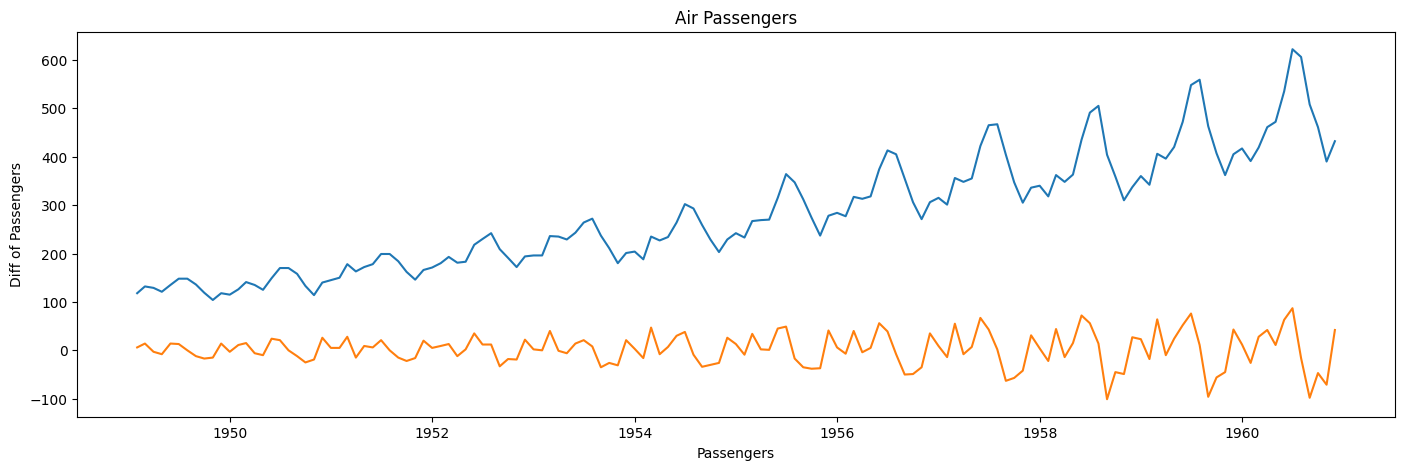

In [ ]:
import matplotlib.pyplot as plt

# Plotting the time series data
plt.figure(figsize=(17, 5))
plt.plot(df['#Passengers'])
plt.plot(df['Passenger_Diff'])
plt.title('Air Passengers')
plt.xlabel('Passengers')
plt.ylabel('Diff of Passengers')
plt.show()

In [ ]:
# 2nd order difference
df["Passenger_Diff 2"]=df['Passenger_Diff'].diff()
df.dropna(inplace=True)
result = adfuller(df['Passenger_Diff'])
p_value = result[1]
if p_value<0.05:
  print("P_Value : ",p_value,"Stationary")
else:
  print("P_Value : ",p_value, "Not Stationary")

P_Value :  0.053655499158908174 Not Stationary


In [ ]:
# Log Difference
import numpy as np
df["log_transformed"] = np.log(df['#Passengers']).diff(2)
df.dropna(inplace=True)
result = adfuller(df["log_transformed"])
p_value = result[1]
if p_value<0.05:
  print("P_Value after Log diff : ",p_value,"Stationary")
else:
  print("P_Value after Log diff : ",p_value, "Not Stationary")


P_Value after Log diff :  0.021919114564039603 Stationary


In [ ]:
df.head()

,#Passengers,Passenger_Diff,Passenger_Diff 2
Month,,,
1949-03-01,132,14.0,8.0
1949-04-01,129,-3.0,-17.0
1949-05-01,121,-8.0,-5.0
1949-06-01,135,14.0,22.0
1949-07-01,148,13.0,-1.0


In [ ]:
df.index

DatetimeIndex(['1949-04-01', '1949-05-01', '1949-06-01', '1949-07-01',
               '1949-08-01', '1949-09-01', '1949-10-01', '1949-11-01',
               '1949-12-01', '1950-01-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=141, freq=None)

In [ ]:
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels import datasets

# Perform seasonal decomposition
result = seasonal_decompose(df['#Passengers'], model='additive')

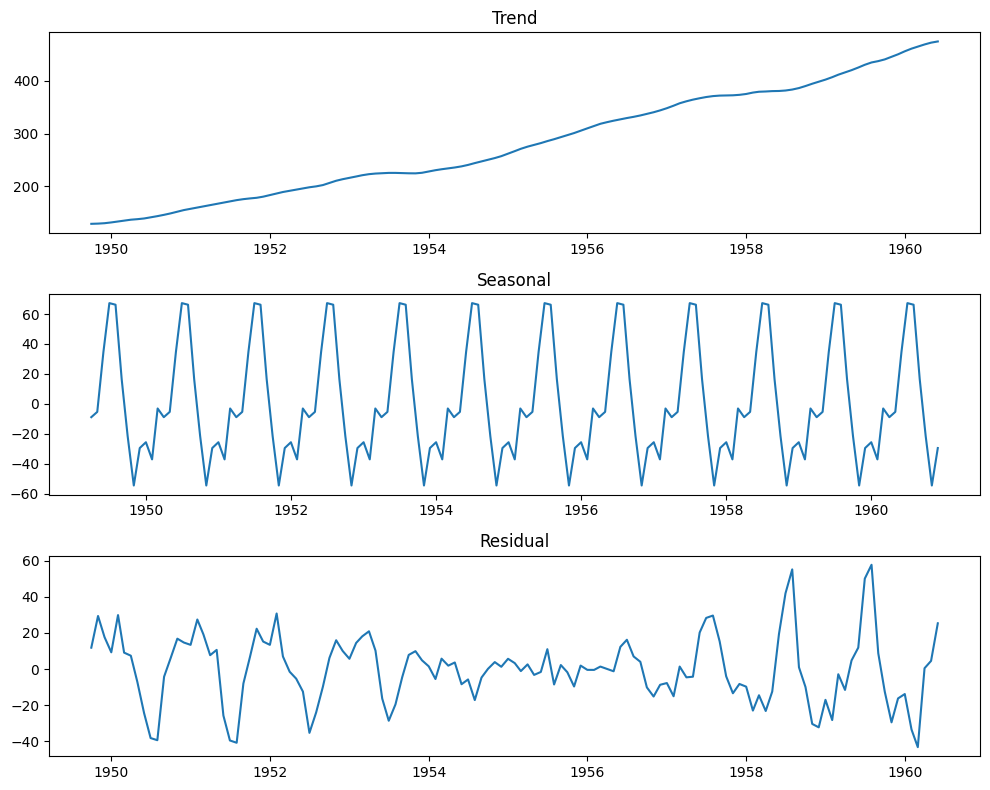

In [ ]:

# Plot the decomposed components
plt.figure(figsize=(10, 8))

plt.subplot(3, 1, 1)
plt.plot(result.trend)
plt.title('Trend')

plt.subplot(3, 1, 2)
plt.plot(result.seasonal)
plt.title('Seasonal')

plt.subplot(3, 1, 3)
plt.plot(result.resid)
plt.title('Residual')

plt.tight_layout()
plt.show()

In [ ]:
df

,#Passengers,Passenger_Diff,Passenger_Diff 2,log_transformed
Month,,,,
1949-04-01,129,-3.0,-17.0,-0.022990
1949-05-01,121,-8.0,-5.0,-0.064022
1949-06-01,135,14.0,22.0,0.109484
1949-07-01,148,13.0,-1.0,0.091937
1949-08-01,148,0.0,-13.0,0.000000
...,...,...,...,...
1960-08-01,606,-16.0,-103.0,-0.026060
1960-09-01,508,-98.0,-82.0,-0.176399
1960-10-01,461,-47.0,51.0,-0.097083


# **SARIMA**

In [176]:
import pandas as pd
import itertools
import numpy as np
import statsmodels.api as sm
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.model_selection import train_test_split
df = pd.read_csv("/content/sample_data/AirPassengers.csv").set_index('Month')
df.index = pd.to_datetime(df.index)
df.head()

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [171]:
len(df)

144

In [179]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
# Splitting the data into training and testing
train_size = int(len(df) * 0.8)
X = df[:train_size]
y = df[train_size:]

In [180]:
len(train_data)

115

In [181]:
len(test_data)

29

In [177]:
# X = df.iloc[:-12]  # Use all data except the last 12 periods as input features
# y = df.iloc[-12:]

In [182]:
# # Split the data into train and test sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

ValueError: ignored

In [183]:
train_X = train_data.index
train_Y = train_data['#Passengers']
test_X = test_data.index
test_Y = test_data['#Passengers']

In [184]:
# Define the range of values for p, d, q, P, D, Q
p_values = range(0,2)  # example range for p
d_values = range(0,2)  # example range for d
q_values = range(0,2)  # example range for q
P_values = range(0,2)  # example range for P
D_values = range(0,2)  # example range for D
Q_values = range(0,2)  # example range for Q
s_values = [12]  # example seasonal period

# Generate all possible combinations of (p, d, q) and (P, D, Q)
param_combinations = list(itertools.product(p_values, d_values, q_values,P_values, D_values, Q_values,s_values))


In [132]:
param_combinations[1]

(0, 0, 0, 0, 0, 1, 12)

In [185]:
from tqdm import tqdm
for params in tqdm(param_combinations):
  param_order=(params[0], params[1], params[2])
  param_seasonal=(params[3], params[4], params[5],params[6])
print("\n",param_order)
print(param_seasonal)

100%|██████████| 64/64 [00:00<00:00, 97862.00it/s]


 (1, 1, 1)
(1, 1, 1, 12)


In [186]:
# Define a function to train SARIMA models and return the AIC value
def train_sarima(param_order, param_seasonal):
    try:
        model = sm.tsa.SARIMAX(train_Y,order=param_order, seasonal_order=param_seasonal)
        fitted_model = model.fit()
        return fitted_model.aic,fitted_model
    except:
        return np.nan

In [187]:
def find_best_pdqs(p_values, d_values, q_values, P_values, D_values, Q_values, s):
  param_combinations = list(itertools.product(p_values, d_values, q_values,P_values, D_values, Q_values,s)) # Generate all possible combinations of (p, d, q) and (P, D, Q)
  # Perform grid search and find the best parameters
  best_aic = np.inf
  best_params = None
  best_seasonal_params = None

  for params in tqdm(param_combinations):
    param_order=(params[0], params[1], params[2])
    param_seasonal=(params[3], params[4], params[5],params[6])
    aic,fitted_model = train_sarima(param_order, param_seasonal)
    if aic < best_aic:
      best_aic = aic
      best_params = param_order
      best_seasonal_params = param_seasonal
  return best_aic,best_params,best_seasonal_params
  # # Print the best (p, d, q) and (P, D, Q) values
  # print("Best AIC:", aic)
  # print("Best (p, d, q) values:", best_params)
  # print("Best (P, D, Q) values:", best_seasonal_params)

In [188]:
def forecast_sarima(model, steps):
    forecast = fitted_model.get_forecast(steps=steps)
    forecast_values = forecast.predicted_mean
    confidence_intervals = forecast.conf_int()
    return forecast_values, confidence_intervals

In [ ]:
# p_values = range(0, 2)  # example range for p
# d_values = range(0, 2)  # example range for d
# q_values = range(0, 2)  # example range for q
# P_values = range(0, 2)  # example range for P
# D_values = range(0, 2)  # example range for D
# Q_values = range(0, 2)  # example range for Q
# s = [12]  # example seasonal period
# # Define the range of values for p, d, q, P, D, Q
# # Find the best (p, d, q, P, D, Q, m) values
# best_aic,best_params, best_seasonal_params = find_best_pdqs(p_values, d_values, q_values, P_values, D_values, Q_values, s)
# print("\n\nBest AIC:", best_aic)
# print("\nBest (p, d, q) values:", best_params)
# print("\nBest (P, D, Q, S) values:", best_seasonal_params)

# **Model Training**

In [189]:
p_values = range(0, 2)  # example range for p
d_values = range(0, 2)  # example range for d
q_values = range(0, 2)  # example range for q
P_values = range(0, 2)  # example range for P
D_values = range(0, 2)  # example range for D
Q_values = range(0, 2)  # example range for Q
s = [12]  # example seasonal period
# Define the range of values for p, d, q, P, D, Q
# Find the best (p, d, q, P, D, Q, m) values
best_aic,best_params, best_seasonal_params = find_best_pdqs(p_values, d_values, q_values, P_values, D_values, Q_values, s)
print("\n\nBest AIC:", best_aic)
print("\nBest (p, d, q) values:", best_params)
print("\nBest (P, D, Q, S) values:", best_seasonal_params)

# Train the SARIMA model with the best parameters
model,fitted_model = train_sarima(best_params, best_seasonal_params)

# Forecast future values
forecast_steps = 12
forecast_values, confidence_intervals = forecast_sarima(model, forecast_steps)
print("Forecasted values:")
print(forecast_values)
print("\nConfidence intervals:")
print(confidence_intervals)

# best_model = None
# best_mae = float('inf')
# # Calculate the MAE
# mae = mean_absolute_error(df['#Passengers'], forecast_values)

# # Check if current model has lower MAE
# if mae < best_mae:
#     best_mae = mae
#     best_model = fitted_model
# print("\n",best_mae,"\n",best_model)

  0%|          | 0/64 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using



Best AIC: 755.4993655556533

Best (p, d, q) values: (1, 1, 0)

Best (P, D, Q, S) values: (0, 1, 0, 12)
Forecasted values:
1958-08-01    490.337911
1958-09-01    427.883043
1958-10-01    370.771413
1958-11-01    328.794272
1958-12-01    359.789591
1959-01-01    363.790550
1959-02-01    341.790353
1959-03-01    385.790394
1959-04-01    371.790385
1959-05-01    386.790387
1959-06-01    458.790387
1959-07-01    514.790387
Freq: MS, Name: predicted_mean, dtype: float64

Confidence intervals:
            lower #Passengers  upper #Passengers
1958-08-01         471.467479         509.208342
1958-09-01         403.773299         451.992787
1958-10-01         341.947095         399.595731
1958-11-01         296.002360         361.586184
1958-12-01         323.446554         396.132629
1959-01-01         324.216437         403.364662
1959-02-01         299.229245         384.351462
1959-03-01         340.438694         431.142093
1959-04-01         323.810107         419.770664
1959-05-01      


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


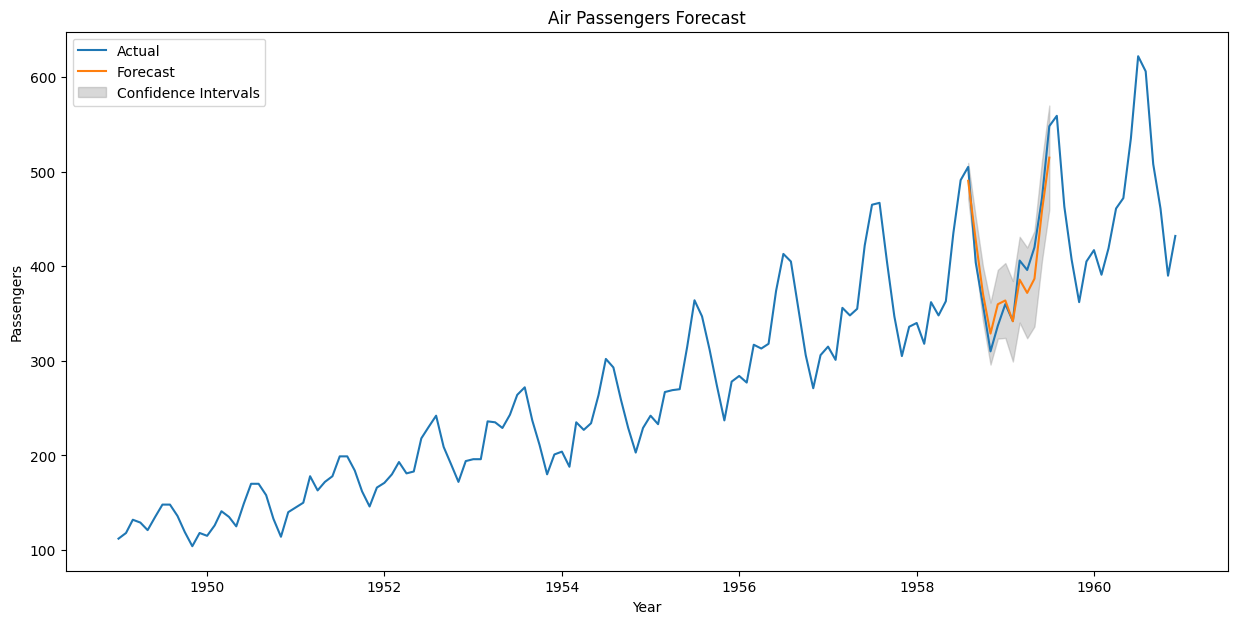

In [190]:
import matplotlib.pyplot as plt
# Plot the forecasted values and confidence intervals
plt.figure(figsize=(15, 7))
plt.plot(df.index, df['#Passengers'], label='Actual')
plt.plot(forecast_values.index, forecast_values, label='Forecast')
plt.fill_between(
    confidence_intervals.index,
    confidence_intervals.iloc[:, 0],
    confidence_intervals.iloc[:, 1],
    color='gray',
    alpha=0.3,
    label='Confidence Intervals'
)
plt.xlabel('Year')
plt.ylabel('Passengers')
plt.title('Air Passengers Forecast')
plt.legend()
plt.show()

# **Model Testing**

In [191]:
# Define a function to test SARIMA models and return the AIC value
def test_sarima(param_order, param_seasonal):
    try:
        model = sm.tsa.SARIMAX(test_Y, order=param_order, seasonal_order=param_seasonal)
        fitted_model = model.fit()
        return fitted_model.aic,fitted_model
    except:
        return np.nan

In [194]:
# Train the SARIMA model with the best parameters
model,fitted_model = test_sarima(best_params, best_seasonal_params)

# Forecast future values
forecast_steps = 12
forecast_values, confidence_intervals = forecast_sarima(model, forecast_steps)
print("Forecasted values:")
print(forecast_values)
print("\nConfidence intervals:")
print(confidence_intervals)

Forecasted values:
1961-01-01    444.418135
1961-02-01    418.243298
1961-03-01    446.316403
1961-04-01    488.285836
1961-05-01    499.298617
1961-06-01    562.293273
1961-07-01    649.295507
1961-08-01    633.294573
1961-09-01    535.294964
1961-10-01    488.294800
1961-11-01    417.294869
1961-12-01    459.294840
Freq: MS, Name: predicted_mean, dtype: float64

Confidence intervals:
            lower #Passengers  upper #Passengers
1961-01-01         408.963664         479.872606
1961-02-01         377.223732         459.262865
1961-03-01         397.302412         495.330395
1961-04-01         433.606937         542.964734
1961-05-01         439.041662         559.555572
1961-06-01         497.106799         627.479746
1961-07-01         579.459187         719.131828
1961-08-01         559.125962         707.463184
1961-09-01         457.022937         613.566990
1961-10-01         406.128234         570.461367
1961-11-01         331.408497         503.181240
1961-12-01         369.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [198]:
model

142.24243755042295

In [197]:
from sklearn.metrics import mean_absolute_error
from joblib import dump
best_model = None
best_mae = float('inf')
# Calculate the MAE
mae = mean_absolute_error(test_Y, forecast_values)

# Check if current model has lower MAE
if mae < best_mae:
    best_mae = mae
    best_model = fitted_model
print("\n",best_mae,"\n",best_model)

ValueError: ignored

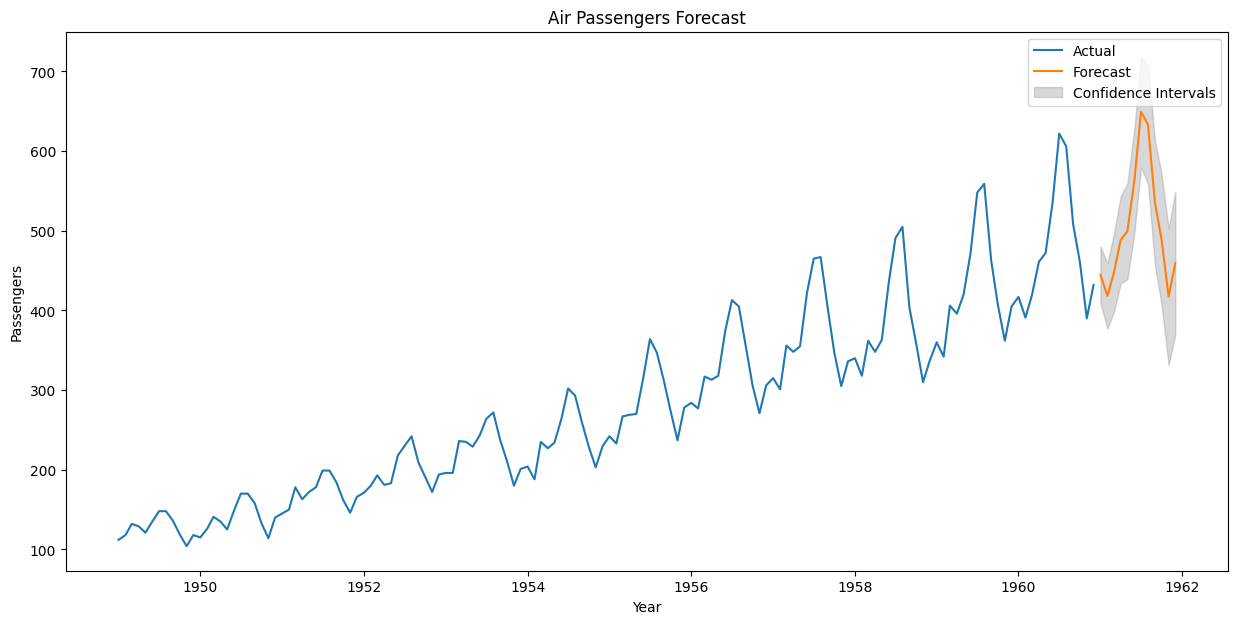

In [ ]:
import matplotlib.pyplot as plt
# Plot the forecasted values and confidence intervals
plt.figure(figsize=(15, 7))
plt.plot(df.index, df['#Passengers'], label='Actual')
plt.plot(forecast_values.index, forecast_values, label='Forecast')
plt.fill_between(
    confidence_intervals.index,
    confidence_intervals.iloc[:, 0],
    confidence_intervals.iloc[:, 1],
    color='gray',
    alpha=0.3,
    label='Confidence Intervals'
)
plt.xlabel('Year')
plt.ylabel('Passengers')
plt.title('Air Passengers Forecast')
plt.legend()
plt.show()